In [1]:
%matplotlib inline

import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras import optimizers
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Activation


Using TensorFlow backend.


## With NN and reshaping

In [2]:
(x1_train, y1_train), (x1_test, y1_test) = mnist.load_data()

In [3]:
print ("x_train.shape: "+str(x1_train.shape))
print ("x_test.shape: "+str(x1_test.shape))
print ("y_train.shape: "+str(y1_train.shape))
print ("y_test.shape: "+str(y1_test.shape))

x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)
y_train.shape: (60000,)
y_test.shape: (10000,)


## Reshaping

In [4]:
X_tr1 = x1_train.reshape(len(x1_train), -1)  # reshaping
X_tr1 = X_tr1.astype('float32')
X_tr1 /= 255  # normalizing
print ("X_tr1: "+str(X_tr1.shape))

X_tr1: (60000, 784)


In [5]:
X_ts1 = x1_test.reshape(len(x1_test), -1)  # reshaping
X_ts1 = X_ts1.astype('float32')
X_ts1 /= 255 # normalizing
print ("X_ts1: "+str(X_ts1.shape))

X_ts1: (10000, 784)


## Categorizing

In [6]:
cat = 10
Y_tr1 = np_utils.to_categorical(y1_train, cat) # categorize
Y_ts1 = np_utils.to_categorical(y1_test, cat)  # categorize
print ("Y_tr1: "+str(Y_tr1.shape))
print ("Y_ts1: "+str(Y_ts1.shape))

Y_tr1: (60000, 10)
Y_ts1: (10000, 10)


## Model building

In [16]:
input_img = Input(shape=(60000, 784))

model=Sequential()

model.add(Dense(units=32, activation='sigmoid', name="1st-layer", ))
model.add(Dense(units=16, activation='sigmoid', name="2nd-layer"))
model.add(Dense(units=10, activation='softmax', name="3rd-layer"))

model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

## fitting data

In [17]:
model_data = model.fit(X_tr1, Y_tr1, epochs=20, batch_size=128, shuffle=True, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 53us/step - loss: 1.6594 - acc: 0.6537 - val_loss: 1.0895 - val_acc: 0.8458
Epoch 2/20
48000/48000 [==============================] - 2s 38us/step - loss: 0.8099 - acc: 0.8609 - val_loss: 0.5812 - val_acc: 0.8904
Epoch 3/20
48000/48000 [==============================] - 2s 37us/step - loss: 0.5027 - acc: 0.8932 - val_loss: 0.4082 - val_acc: 0.9089
Epoch 4/20
48000/48000 [==============================] - 2s 36us/step - loss: 0.3811 - acc: 0.9101 - val_loss: 0.3306 - val_acc: 0.9216
Epoch 5/20
48000/48000 [==============================] - 2s 48us/step - loss: 0.3162 - acc: 0.9214 - val_loss: 0.2863 - val_acc: 0.9289
Epoch 6/20
48000/48000 [==============================] - 2s 39us/step - loss: 0.2740 - acc: 0.9303 - val_loss: 0.2557 - val_acc: 0.9345
Epoch 7/20
48000/48000 [==============================] - 2s 37us/step - loss: 0.2440 - acc: 0.9360 - val_loss: 0.2348 - val_acc

## prediction

In [18]:
predict = model.predict_classes(x=X_ts1)

## define result function

In [19]:
def results():
    count = 0
    for i in range(len(x1_test)):
        if y1_test[i] != predict[i]:
            print (str(predict[i])+"!="+str(y1_test[i]), end=", ")
            count+=1
    print ("\n\nwrong count = "+str(count))

## result

In [20]:
results()

6!=5, 2!=8, 4!=9, 9!=8, 8!=9, 6!=4, 0!=6, 9!=8, 3!=2, 7!=9, 7!=2, 3!=5, 0!=5, 9!=7, 7!=3, 3!=5, 2!=4, 0!=6, 8!=9, 1!=2, 7!=3, 3!=9, 7!=9, 0!=8, 5!=3, 7!=4, 2!=3, 3!=8, 2!=8, 8!=2, 3!=8, 6!=4, 8!=2, 4!=8, 7!=5, 6!=0, 8!=5, 9!=4, 7!=8, 4!=9, 7!=9, 7!=2, 5!=3, 6!=2, 5!=3, 9!=8, 4!=5, 2!=1, 0!=6, 7!=9, 5!=6, 5!=3, 9!=7, 8!=6, 3!=9, 6!=4, 8!=3, 1!=6, 8!=6, 9!=7, 8!=3, 2!=7, 4!=9, 5!=8, 9!=4, 3!=9, 6!=4, 1!=7, 4!=5, 7!=5, 7!=3, 3!=8, 2!=7, 2!=8, 6!=5, 3!=5, 9!=4, 9!=4, 6!=5, 7!=3, 9!=7, 1!=7, 9!=7, 0!=5, 2!=1, 7!=8, 6!=4, 8!=9, 3!=9, 9!=7, 6!=2, 7!=4, 7!=9, 6!=5, 0!=2, 7!=3, 5!=9, 0!=8, 2!=7, 4!=2, 7!=3, 1!=5, 3!=4, 2!=7, 5!=1, 2!=8, 9!=2, 4!=6, 9!=8, 9!=4, 2!=8, 4!=9, 6!=4, 9!=7, 3!=9, 4!=6, 6!=2, 2!=7, 7!=1, 9!=7, 8!=4, 7!=2, 9!=4, 9!=7, 0!=2, 7!=3, 0!=6, 8!=9, 9!=4, 1!=6, 2!=1, 3!=2, 8!=9, 8!=5, 6!=5, 6!=1, 0!=8, 6!=9, 7!=2, 5!=3, 3!=7, 2!=0, 9!=4, 0!=9, 1!=9, 3!=8, 2!=8, 1!=9, 4!=9, 7!=6, 7!=9, 1!=2, 5!=6, 0!=2, 3!=5, 8!=5, 2!=3, 7!=5, 7!=9, 4!=7, 8!=2, 6!=0, 0!=9, 1!=6, 8!=5, 4!=9, 0!=2

## Plotting

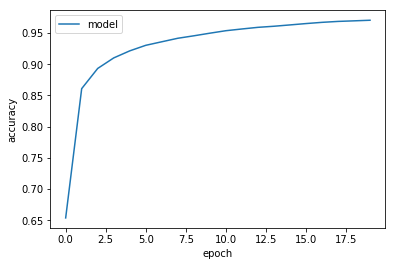

In [21]:
plt.plot(model_data.history["acc"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["model"], loc="best")
plt.show()